# Экспоненциальные рост и угасание

In [1]:
%pylab inline
from ipywidgets import interact, interact_manual
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Экспоненциальный рост

Операция возведения в степень происходит из идеи перемножения числа самого на себя.
При увеличении аргумента показательной функции работает интуиция, что мы умножаем число само на себя всё больше и больше раз.

In [19]:
2 * log2(e)

2.8853900817779268

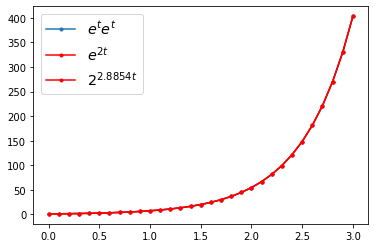

In [2]:
t = arange(0,3.1,.1)
plot(t, exp(t)*exp(t), '.-', label=r'$e^t e^t$');
plot(t, exp(t*2), 'r.-', label=r'$e^{2 t}$');
plot(t, 2**(2*log2(e)*t), 'r.-', label=r'$2^{2.8854 t}$');
legend(fontsize='x-large');

На рисунке линии совпадают, поскольку при перемножении степеней их показатели складываются. Значение функции с аргументом $t=3$ - это $e^6$.
График включает также значения, где аргумент нецелое число.
Несмотря на то, что представить нецелое количество умножений невозможно, возводить можно не только в целую степень, но и в дробную и отрицательную.

Подобрать показатель степени можно так, что из любого основания получить заданное число. Такой показатель называет логарифм. С помощью логарифма можно заменить основание любой показательной функции на число $e$, если при этом показатель умножить на поправочный коэффициент.

:::{seealso}
[Памятка по показательным функциям](https://1cov-edu.ru/mat_analiz/funktsii/pokazatelnaya/)
:::

## Экспоненциальное угасание

Если функцию экспоненциального роста мы перенесем в знаменатель, то на каждом следующем шаге мы будем получать постепенно уменьшающуюся долю единицы. Более изящая запись - показатель степени с минусом.

$$ \frac{1}{e^t} = e^{-t} $$

In [25]:
exp(-1)

0.36787944117144233

Через 1 временной шаг значение функции угасания составит примерно 0.37 от исходного. Так быстро в природе обычно ничего не убывает. В древности вывели степень красивого угасания под названием "[золотое сечение](https://ru.wikipedia.org/wiki/Золотое_сечение)", когда на каждом шаге должно оставаться примерно 0.618 от предыдущего количества. Т.е. скорость "золотого" угасания примерно в 2 раза медленнее, чем у чистого "экспоненциального спуска".

Давайте посмотрим на эти угасания для нескольких временных шагов.

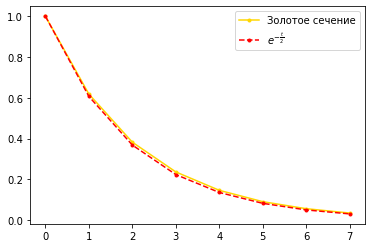

In [28]:
t = arange(8)
z = 0.61803398875 #fibonacci()
plot(t, z**t, '.-', color='gold', label='Золотое сечение')
plot(t, exp(-t/2), 'r.--', label=r'$e^{- \frac{t}{2}}$');
legend();

Процесс убывания по правилу золотого сечения удивительно похож на процесс экспоненциального убывания с половинным показателем степени. А можно ли последовательное золотое сечение привести к функции с основанием $e$?

Пусть $z = 0.618... $ - золотое сечение. Мы хотим подобрать такую функцию с основанием $e$, чтобы скорость изменения была такой же, как у функции последовательного золотого сечения $ z^t $. Скорость изменения функции - это ее дифферециал. Дифференциал $e^t$ равен t. Продифференцируем...

$$ z^t = e^{ \ln(z^t)} = e^{ \ln(z) \cdot t} $$

$$ (z^t)' = \ln(z) \cdot t$$

$\ln(z)$ - это коэффициент изменения скорости многократного золотого сечения по отношению к стандартной показательной функции с основанием $e$. 


In [29]:
log(z)

-0.4812118250594332

Немного отличается от -0.5

Скорость угасания удобно задавать через косвенные параметры. Например, в основание показательной функции можно поставить другое значение.

$$\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{размах (span)}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{центр масс (center of mass)}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{полураспад (half-life)}\ h > 0
 \end{cases}\end{split}$$


### Фактор сглаживания $\alpha$
Показывает на какую долю снижается величина за один шаг.
То есть на каждом следующем шаге остается $(1-\alpha)$ от текущего значения.
Значение $(1-\alpha)$ называют *фактор затухания*. 

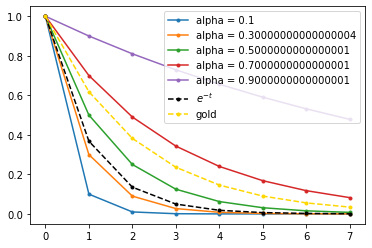

In [44]:
for a in arange(0.1, 1, .2):
    w = a**t
    plot(t, w, '.-', label='alpha = {}'.format(a));
    
plot(t, exp(-t), 'k.--', label=r'$e^{- t}$');
plot(t, z**t, '.--', color='gold', label='gold')
legend();

С повышением фактора сглаживания (понижением фактора затухания) угасание становится всё медленнее. Т.е. "действие" исходного значения распространяется на более продолжительный период.

Используется при оценке убывания вследствие вероятностных потерь. Например, при выживаемости поголовья 90% после первого временного шага останется 0.9 от исходного количества, после второго - 0.81 (90% от 0.9) и т.д. То есть действующие риски сохраняются на каждом шаге неизменными.

### Размах угасания $s$
Показывает за сколько шагов величина снизится до незначимой величины. То есть грубо "время жизни".

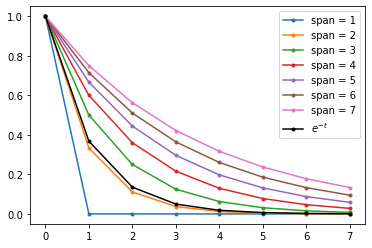

In [41]:
for s in arange(1, 8):
    a = 2/(s+1)
    w = (1 - a)**t
    plot(t, w, '.-', label='span = {}'.format(s));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
legend();

Используется тогда, когда интересует не текущая величина, а время, за которое заданное количество израсходуется.

### Центр масс $c$
Определяет скорость угасания по позиции центра масс - если вырезать из картона фигуру из площади под кривой, то центр масс будет точкой равновесия: широкое быстросуживающееся начало уравновесится с узким, но бесконечно длинным хвостом.

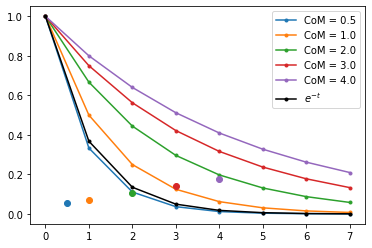

In [42]:
for c in r_[.5, arange(1, 5)]:
    a = 1/(c+1)
    w = (1 - a)**t
    line = plot(t, w, '.-', label='CoM = {}'.format(c));
    plot(c, 1/sum(t*a), 'o', color=line[0].get_color())
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
legend();

Используется для оценки общей экспозиции убывающего вещества или фактора за весь период времени. Например, дозу радиации оценивают как сумму мощности отдельных доз в микрозиверт в час.

### Период полураспада $h$
Задает скорость угасания как снижение на половину от исходного уровня.

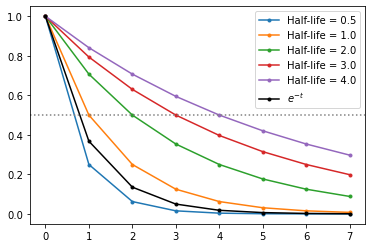

In [32]:
for h in r_[.5, arange(1, 5)]:
    w = 2**(-t/h)  # exp(t*log(.5)/h)
    plot(t, w, '.-', label='Half-life = {}'.format(h));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
axhline(.5, ls=':', color='gray')
legend();

Используется как понятная для человека метрика расходования вещества. 

> Сравните графики с периодом полураспада 2 и 4 - количество на разных временных шагах не различается в два раза! Чем больше период полураспада, тем меньше разница между процессами угасания.

Скорости выведения лекарств важно учитывать при совместном использовании нескольких взаимокомпенсирующих препаратов. Может оказаться так, что первичное соотношение доз, рассчитанных на кг массы тела пациента, может значительно исказиться по прошествии времени.

### Постоянная времени $\tau$
Xарактеризует время убывания значения до уровня $1/e\approx 0.368$ от своего первоначального значения. То есть показывает во сколько раз процесс медленнее стандартного экспоненциального спада.


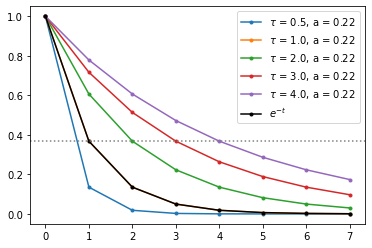

In [39]:
for tau in r_[.5, arange(1, 5)]:
    w = exp(-t/tau)
    plot(t, w, '.-', label=r'$\tau$ = {}, a = {:.2f}'.format(tau, a));
    
plot(t, exp(-t), 'k.-', label=r'$e^{- t}$');
axhline(exp(-1), ls=':', color='gray')
legend();

Эта метрика популярна у электронщиков для описания свойств радиоэлементов и приборов.

Чтобы не запутаться в "экспоненциальных процессах", надо помнить ключевые моменты.

1. Если число в основании степени меньше единицы, то сколько бы его не умножали на самого себя (возводили в положительную степень), оно будет становиться только меньше, т.е. будет экспоненциальный спад. $0.5 ^{[1,2,3,4]} = [0.500, 0.250, 0.125, 0.063]$ 
2. Если мы возводим число в отрицательную степень, то это равносильно тому, что один поделить на это число в положительной степени. Если число больше единицы (например, 2, 2.718), то будет экспоненциальный спад. $2 ^ {[-1,-2,-3,-4]} = \left[\frac{1}{2}, \frac{1}{4}, \frac{1}{8}, \frac{1}{16}\right]$
3. Для изменения шкалы (перевода из одних величин в другие) надо поделить число в исходных единицах на количество исходных единиц в новой шкале. Это тривильно для перевода километров в метры, но может быть путанно при конвертации скоростей. Например, постоянная времени $\tau$ меняет скорость процесса через приведение реальной временной шкалы к той, которая была бы при стандартном экспоненциальном спаде. 
Скорость изменения процесса в формулах выражается как производная, а производная отношения двух функций НЕ РАВНА отношению производных от каждой из них (См. [Правила_дифференцирования](https://ru.wikipedia.org/wiki/Производная_функции#Правила_дифференцирования) ).

Для проверки полезно отобразить сравниваемые процессы в виде графиков. Скорость процесса (производная) - это тангенс наклона касательной в данной точке. Т.е. если процесс замедляется со временем, т.е. его скорость постепенно угасает, то касательная постепенно теряет свой угол, постепенно приближаясь к горизонтальной прямой, угол которой равен нулю. Именно так ведут себя касательные в последовательных точках экспоненциального спада.
Чем быстрее происходит экспоненциальный спад, тем быстрее касательной нужно "выправляться" из пикирующего состояния к горизонтальному. Из формулы производной показательной функции следует, что замедление спада пропорционально логарифму основания степени. Логарифм - функция, обратная экспоненте, т.е. логарифм здесь компенсирует экспоненту, чтобы прийти в ноль.

$$(a^t)' = a^t \cdot \ln{a}$$

Если основание степени $a$ в формуле сделать равным числу Эйлера $e$, то второй множитель в выражении справа будет равен 1 по определению, и получится определение экспоненты - функция, производная которой равна самой функции, или скорость изменения процесса равна текущему значению. Из-за этого удобства показательные функции приводят к экспоненциальным с $e$ в основании, изменяя только их показатель путем добавления коэффициента при нем. Таким образом, мы описываем процесс в "экспоненциальных спадах" с непостоянной изменяющейся скоростью. Если мы хотим получить значение скорости в какой-то момент времени в ед/с, то нужно дифференцировать - находить производную:

$$\left(e^{at}\right)' = ae^{at}$$

Изменение за один временной шаг равно произведению одного и того же коэффициента $a$ на текущее значение экспоненциального процесса.

Например, выше мы уже рассмотрели многократное золотое сечение ($a=\ln(z)=-0.4812$) и привели его к экспоненциальной форме. И прикинули, что снижение медленнее стандратного экспоненциального спуска примерно в два раза.

$$ z^t = e^{ \ln(z) \cdot t} = e^{ - \frac{t}{\tau_z}} $$
$$ \ln(z)  = - \frac{1}{\tau_z}$$
$$\tau_z = - \frac{1}{\ln(z)}$$

In [ ]:
-1/log(z)

Таким образом, постоянная времени многократного золотого сечения $\tau_z = - \frac{1}{\ln(z)} = 2.078$.

Биологические процессы, в которых на каждом следующем шаге действует только часть агентов $0<p<1$, действовавших на предыдущем шаге, имеют вид экспоненциального спада (exponential decay).

## Сложные процессы

Переходные процессы - переход из одного состояния в другое.

Такие процессы типичны для физики и химии. Биология изучает многие физические и химические процессы в рамках отраслей биофизики и биохимии. Почти все они описываются дифференциальными уравнениями, т.е. которые задают не всю форму кривой процесса, а только разницу между текущим и предыдущим состоянием.
Собственно биологических процессов, связанных с размножением, динамикой популяций, поведением, которые хорошо описывались бы экспоненциальными моделями очень немного. Такие процессы похожи на физические процессы рассеивания света - на каждом следующем шаге остается только часть исходного количества.

Экспоненциальный спад численности наблюдается в случае естественного вымирания, когда есть полное разрушение среды обитания, но жизни самих организмов ничего не угрожает.  При этом нет ни внезапной гибели всей популяции как при пересыхании отдельной лужи, ни частичного разрушения среды обитания, когда можно перебежать или переползти в соседнюю лужу/соседний лес. Полное разрушение происходит при гибели хозяина, тело которого является средой обитания паразита, причем изолированной от аналогичных сред. Так, угасание микробных сообществ в кишечнике человека после смерти идёт по экспоненте и остаточное количество конкретных видов бацилл может использоваться для вычисления времени смерти {cite}`hauther2015`.

Если другое состояние нестабильно, то система возвращается в исходное состояние. Траектория возвращения может быть другой. Живые системы нестабильны, но стремятся к гомеостазу - квазистабильному состоянию. Например, божья коровка на стебельке - упадет вниз - снова вскарабкается. Распрямление примятой травы - сгибается от верхушки, распрямляется от корня.

Функция экспоненты годится для порождения более сложных функций. Но для этого мы должны усложнить показатель степени - сделать его комплексным (лат. complexus - полученный в результате комплектации). Формально - комплексное число такое же как и остальные - с ним можно производить разные операции, например, возводить в степень. Технически, с точки зрения компьютера, - это два числа - обычное число (вещественная часть) и коэффициент перед мнимой единицей (мнимая часть), которые зависимы друг от друга и для наглядности изображаются как вектор - одно задает длину вектора, а другое - направление. Мнимая единица - особый объект, который одновременно и 1 и -1, в коде обозначается 1j.

In [49]:
exp(-(1+0j)), exp(-(0+1j))

((0.36787944117144233-0j), (0.5403023058681397-0.8414709848078965j))

> Посмотрите, что будет, если возводить число $e$ в комплексную степень.
(1) Можно двигать бегунок, (2) можно перемещать активный бегунок стрелочками клавиатуры влево и вправо, (3) можно вбивать число в поле справа.

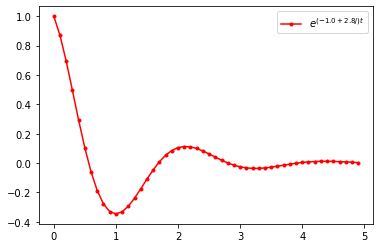

In [53]:
t = arange(0,5,.1).astype(np.complex)

@interact(a=(-5.,5.), b=(-5.,5.))
def _plot(a=-1.,b=2.8):
    plot(t, exp((a+b*1j)*t), 'r.-', label=r'$e^{{({}+{}j) t}}$'.format(a,b));
    legend();

В окрестности нуля функция почти прямой формы, но резко меняет направление - от снижения к росту.
Если установить  а=0, то изменение b ведет к появлению циклических колебаний.

Изменением обоих параметров можно получить затухающие колебания, одиночные горбы и впадины.
Поскольку все многообразие траекторий задается всего одним комплексным числом, то разработаны способы подбора параметров для получения сжатого математического описания разных процессов.

Примеры описания процессов:
  - $a = -5, b = -5$ - координата кончика вибриссы относительно уровня кожи при прикасании к колену: сначала вдавливается в кожу, потом остается на поверхности.
  - $a = -1.8, b = -4.2$ - изменение координаты центра тела при прыжке в высоту: сначала приседание, затем прыжок и приземление.
  - $a = 0.3, b = 1.6$ - горизонтальные изменения положения тела змеи

В реальности аналогов комплексных чисел нет и все сложные биологические процессы состоят из нескольких фаз - фаз подъема и спада.
Однако, знакомство с тем, как возведение в комплексную степень может порождать колебания разных частот, полезно для интуитивного понимания математических приемов разложения сигналов на составляющие.